In [319]:
import os
import array


import numpy as np
import matplotlib.pyplot as plt

from math import ceil
from scipy import signal
from decimal import Decimal
from numpy.random import random_sample

In [181]:
def chunk(arr, size):
    return list(
        map(lambda x: arr[x * size:x * size + size],
            list(range(0, ceil(len(arr) / size)))))

1.0188487009679061


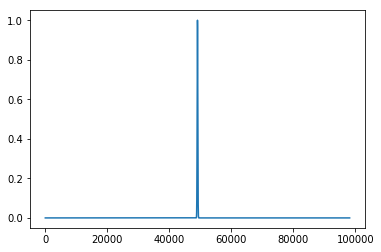

In [324]:
period_s = 0.9815 # желаемая точность - до 5 знака
pulse = signal.gaussian(period_s*10e4, std=100, sym=True)
#window = np.array([random_sample(1)*random_sample(1)*i for i in window])
plt.plot(pulse)
print(1/period_s)

In [325]:
obser = pulse[:]
for i in range(100):
    obser = np.append(obser, random_sample(1)*pulse)

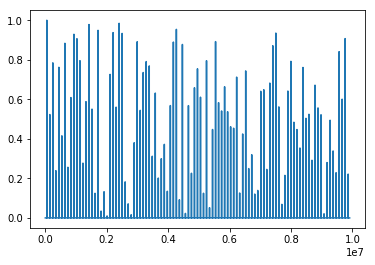

In [326]:
plt.close()
plt.plot(obser)
plt.show()

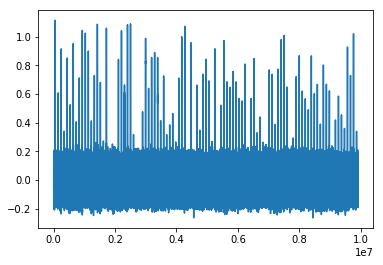

In [327]:
noised_obser = obser + np.random.normal(0, 0.05, len(obser))
plt.close()
plt.plot(noised_obser)
plt.show()

In [328]:
obs_points = len(noised_obser)
x = bin(obs_points)
x_high = '0b1' + '0'*(len(x[2:]))
add_points = int(x_high, 2) - obs_points
print(add_points, obs_points + add_points)
obs_points += add_points
noised_obser = np.append(noised_obser, np.zeros(add_points))

6864066 16777216


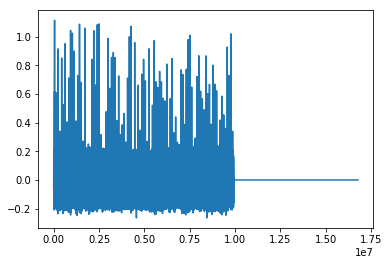

In [331]:
plt.close()
plt.plot(noised_obser)
plt.show()

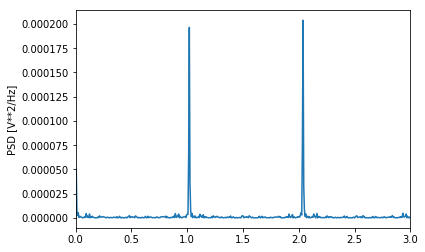

In [332]:
fs = 1*10e4 # частотота дискретизации временных рядов 
f, Pxx_den = signal.periodogram(noised_obser, fs)
plt.plot(f, Pxx_den)
plt.ylabel('PSD [V**2/Hz]')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
plt.xlim(0, 3)
plt.show()

In [330]:
peaks, _ = signal.find_peaks(Pxx_den, height=0.5*max(Pxx_den))
main_harm = f[peaks][0]
for i in f[peaks][0:10]:
    print(i, i/main_harm)

1.0192394256591795 1.0
2.038478851318359 2.0
3.0577182769775386 3.0
4.076957702636718 4.0
5.0961971282958975 5.0
6.115436553955077 6.0
7.134675979614257 7.000000000000001
8.147954940795897 7.994152046783626
9.167194366455076 8.994152046783626
10.186433792114256 9.994152046783626


1.0013580322265623

In [254]:
len(obser)

315000

In [255]:
len(pulse)

15000

In [256]:
len(pulse)*21

315000